# LSTM

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import random

# Set Seed

In [2]:
random.seed(10)

# Load Data

In [3]:
#agg_data_monthly = pd.read_csv("aggregate_data_daily.csv", parse_dates=True)
#agg_data_monthly['date'] = pd.to_datetime(agg_data_monthly.date).dt.strftime("%Y-%m")
#agg_data_monthly.sort_values(by='date',ascending=False)
#agg_data_monthly = agg_data_monthly.groupby(["date"]).mean()
#agg_data_monthly.index = pd.DatetimeIndex(agg_data_monthly.index)

In [4]:
df = pd.read_csv('aggregate_data_daily.csv')
df1 = df['close']
df1

0       131288.958237
1       131832.877280
2       129468.922827
3       129249.723173
4       127985.717387
            ...      
1764    257670.968933
1765    259022.745291
1766    258462.879837
1767    259788.447905
1768    260920.830000
Name: close, Length: 1769, dtype: float64

### Monthly

In [5]:
df1_max = max(df['close'])
df1_min = min(df['close'])

# Data Preprocessing

In [6]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
training_size=int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Train/Test Split

In [9]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_train2, y_train2 = X_train, y_train
X_test, y_test = create_dataset(test_data, time_step)
X_test2, y_test2 = X_test, y_test

In [10]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [11]:
X_train.shape[1]

100

# Model

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,121
Trainable params: 21,121
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False)

Epoch 1/20
18/18 [==============================] - 3s 39ms/step - loss: 0.0445
Epoch 2/20
18/18 [==============================] - 1s 39ms/step - loss: 0.0304
Epoch 3/20
18/18 [==============================] - 1s 39ms/step - loss: 0.0208
Epoch 4/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0175
Epoch 5/20
18/18 [==============================] - 1s 35ms/step - loss: 0.0146
Epoch 6/20
18/18 [==============================] - 1s 37ms/step - loss: 0.0147
Epoch 7/20
18/18 [==============================] - 1s 41ms/step - loss: 0.0125
Epoch 8/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0111
Epoch 9/20
18/18 [==============================] - 1s 40ms/step - loss: 0.0118
Epoch 10/20
18/18 [==============================] - 1s 39ms/step - loss: 0.0102
Epoch 11/20
18/18 [==============================] - 1s 40ms/step - loss: 0.0106
Epoch 12/20
18/18 [==============================] - 1s 39ms/step - loss: 0.0090
Epoch 13/20
18/18 [==================

# Prediction

In [15]:
test_predict = model.predict(X_test)

14/14 [==============================] - 1s 9ms/step


In [16]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.01675643786486316
R2 -0.8893174358600329


In [17]:
test_predict= scaler.inverse_transform(test_predict)
train_predict = model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

36/36 [==============================] - 0s 9ms/step


In [18]:
train_predict

array([[131953.72],
       [132461.38],
       [132511.67],
       ...,
       [167065.33],
       [167588.1 ],
       [167960.94]], dtype=float32)

In [19]:
y_test2 = (y_test * (df1_max - df1_min)) + df1_min
y_test2

array([212623.20093333, 213318.26721763, 212244.01336898, 213349.14704301,
       213969.64786667, 214112.87293333, 215857.47090164, 216456.52173913,
       215983.80912807, 213786.59572193, 208875.80266667, 212653.91720867,
       214041.55683646, 215754.95253333, 215925.0296    , 216546.41136364,
       217432.04786096, 217986.16567568, 218850.20533333, 219469.76253333,
       221093.4684492 , 222471.7925876 , 224561.70672043, 225995.0792    ,
       227105.62866848, 226500.6884    , 226211.16420912, 225811.15773333,
       227301.26085165, 225079.86029412, 223125.14213333, 219781.72426667,
       217053.37226667, 216628.18221925, 217799.27372654, 228009.79933155,
       231188.44933155, 233093.03853333, 234692.42053333, 237689.6407754 ,
       239275.55374332, 237537.37386667, 238891.24946524, 239135.00201072,
       241629.90546667, 241744.8355615 , 239771.94758065, 238413.60215054,
       235920.59108108, 232230.21724599, 231154.19173333, 232683.56984127,
       235172.74      , 2

In [20]:
print(f'MSE {mean_squared_error(y_test2, test_predict)}')
print(f'R2 {r2_score(y_test2, test_predict)}')
print(f'MAE {math.sqrt(mean_squared_error(y_test2, test_predict))}')

MSE 483127157.82817465
R2 -0.8893166922416029
MAE 21980.15372621799


In [21]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

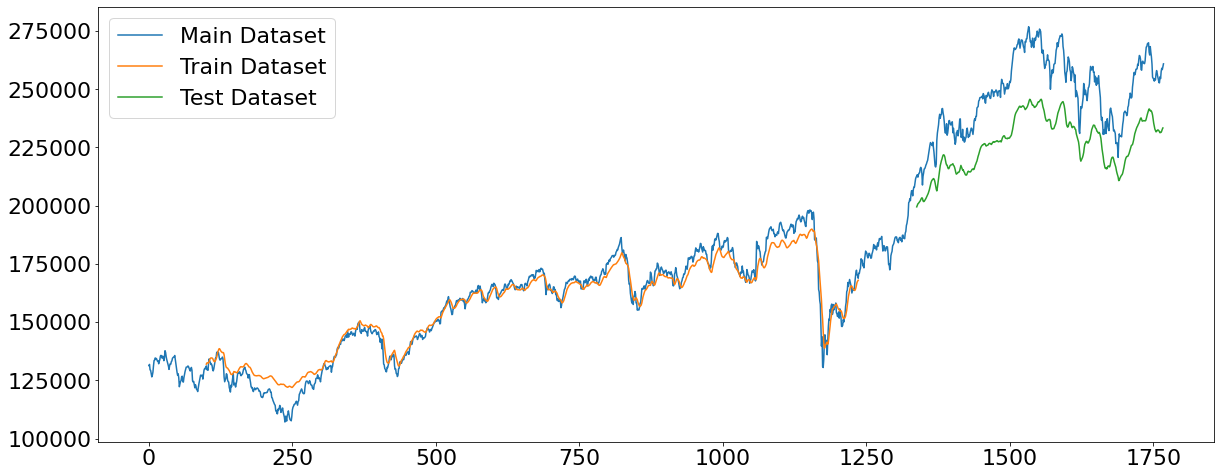

In [22]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})
plt.plot(scaler.inverse_transform(df1), label = 'Main Dataset')
plt.plot(trainPredictPlot, label = 'Train Dataset')
plt.plot(testPredictPlot, label = 'Test Dataset')
plt.legend()